In [1]:
%matplotlib inline



# Maximum Bipartite Matching by Maximum Flow

This example presents how to visualise bipartite matching using maximum flow (see :meth:`igraph.Graph.maxflow`).

<div class="alert alert-info"><h4>Note</h4><p>:meth:`igraph.Graph.maximum_bipartite_matching` is usually a better way to find the maximum bipartite matching. For a demonstration on how to use that method instead, check out `tutorials-bipartite-matching`.</p></div>


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

We start by creating the bipartite directed graph.



In [3]:
g = ig.Graph(
    9,
    [(0, 4), (0, 5), (1, 4), (1, 6), (1, 7), (2, 5), (2, 7), (2, 8), (3, 6), (3, 7)],
    directed=True
)

We assign:
 - nodes 0-3 to one side
 - nodes 4-8 to the other side



In [4]:
g.vs[range(4)]["type"] = True
g.vs[range(4, 9)]["type"] = False

Then we add a source (vertex 9) and a sink (vertex 10)



In [5]:
g.add_vertices(2)
g.add_edges([(9, 0), (9, 1), (9, 2), (9, 3)])  # connect source to one side
g.add_edges([(4, 10), (5, 10), (6, 10), (7, 10), (8, 10)])  # ... and sinks to the other

flow = g.maxflow(9, 10)
print("Size of maximum matching (maxflow) is:", flow.value)

Size of maximum matching (maxflow) is: 4.0


Let's compare the output against :meth:`igraph.Graph.maximum_bipartite_matching`:



In [6]:
# delete the source and sink, which are unneeded for this function.
g2 = g.copy()
g2.delete_vertices([9, 10])
matching = g2.maximum_bipartite_matching()
matching_size = sum(1 for i in range(4) if matching.is_matched(i))
print("Size of maximum matching (maximum_bipartite_matching) is:", matching_size)

Size of maximum matching (maximum_bipartite_matching) is: 4


Last, we can display the original flow graph nicely with the matchings added.
To achieve a pleasant visual effect, we set the positions of source and sink
manually:



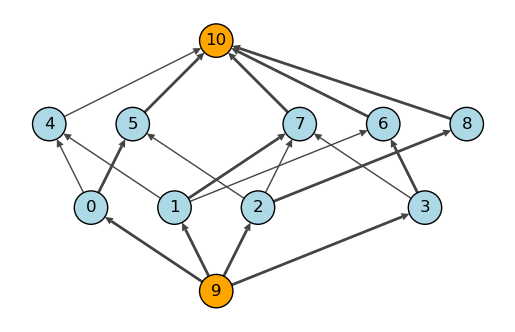

In [7]:
layout = g.layout_bipartite()
layout[9] = (2, -1)
layout[10] = (2, 2)

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_size=0.4,
    vertex_label=range(g.vcount()),
    vertex_color=["lightblue" if i < 9 else "orange" for i in range(11)],
    edge_width=[1.0 + flow.flow[i] for i in range(g.ecount())]
)
plt.show()